<a href="https://colab.research.google.com/github/jyotikashyap85399-tech/Image-classification/blob/main/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('/content/sample_data/wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class label', 'alcohol', 'Malic acid']

In [23]:
df

,Class label,alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='alcohol', ylabel='Density'>

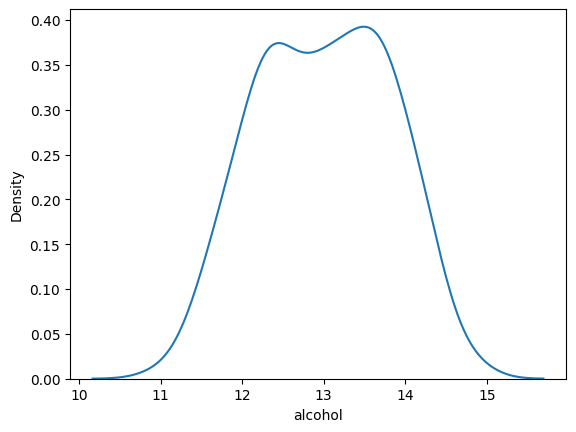

In [24]:
sns.kdeplot(df['alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

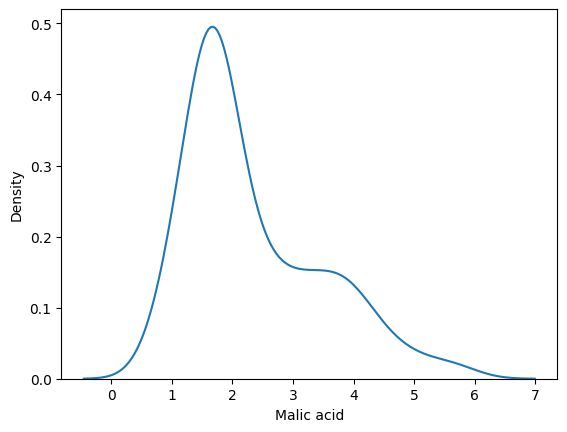

In [25]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='alcohol', ylabel='Malic acid'>

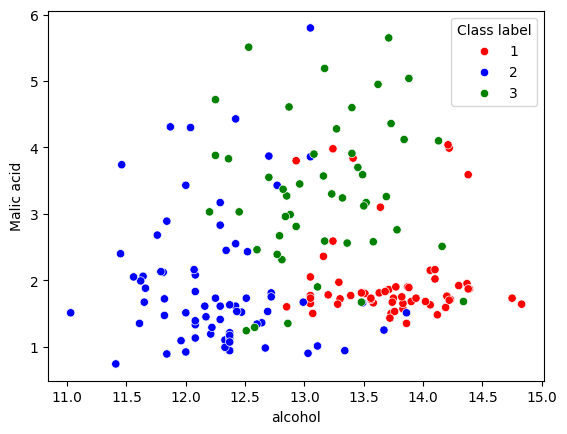

In [26]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x='alcohol', y='Malic acid', hue=df['Class label'], palette=color_dict, data=df)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(df.drop('Class label', axis=1),
                                                   df['Class label'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
np.round(X_train.describe(), 1)

,alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


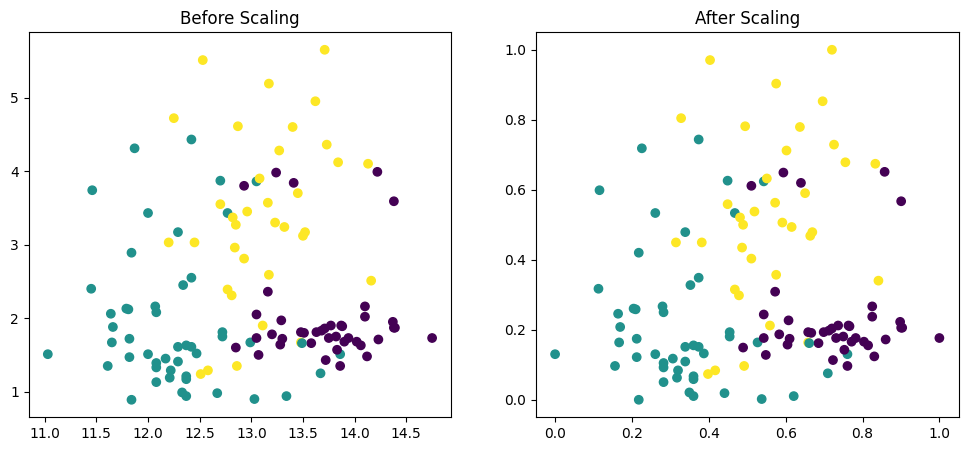

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()